In [2]:
import pandas as pd

df_benin = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")
df_sierra = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\sierraleone-bumbuna.csv")
df_togo = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\togo-dapaong_qc.csv")

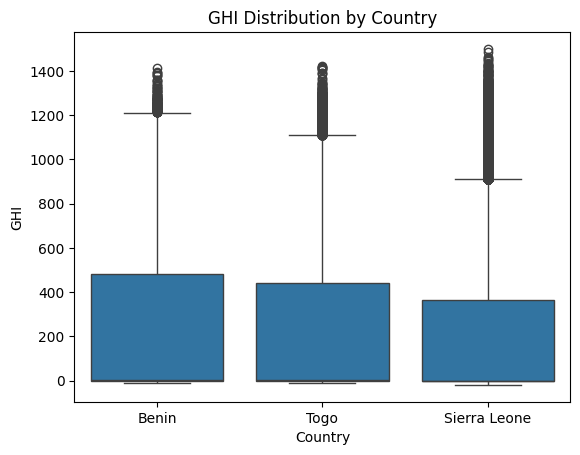

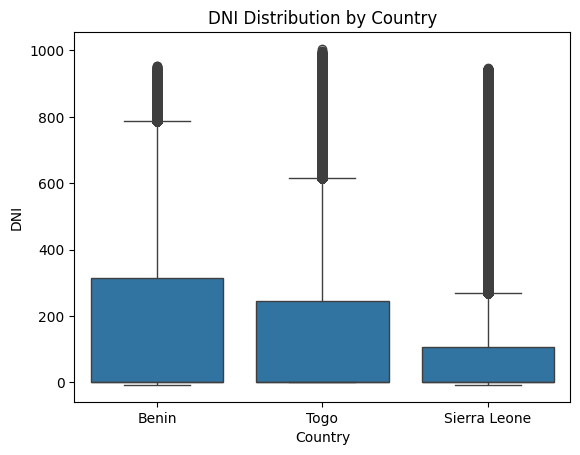

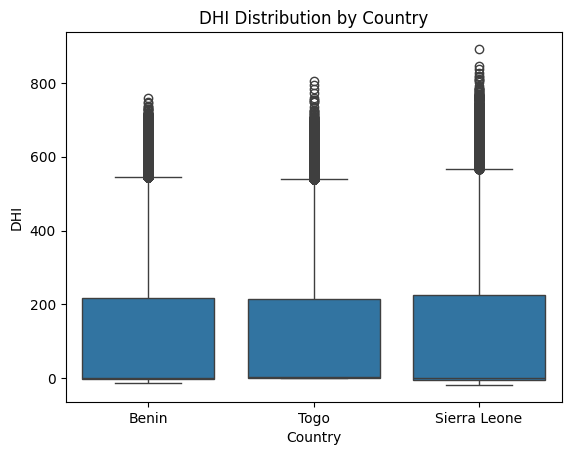

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df_benin["Country"] = "Benin"
df_togo["Country"] = "Togo"
df_sierra["Country"] = "Sierra Leone"

combined_df = pd.concat([df_benin, df_togo, df_sierra])

for metric in ["GHI", "DNI", "DHI"]:
    sns.boxplot(x="Country", y=metric, data=combined_df)
    plt.title(f"{metric} Distribution by Country")
    plt.show()


In [4]:
summary = combined_df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
print(summary)


                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [5]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df_benin["GHI"], df_togo["GHI"], df_sierra["GHI"])
print(f"ANOVA test p-value: {p_val}")


ANOVA test p-value: 0.0


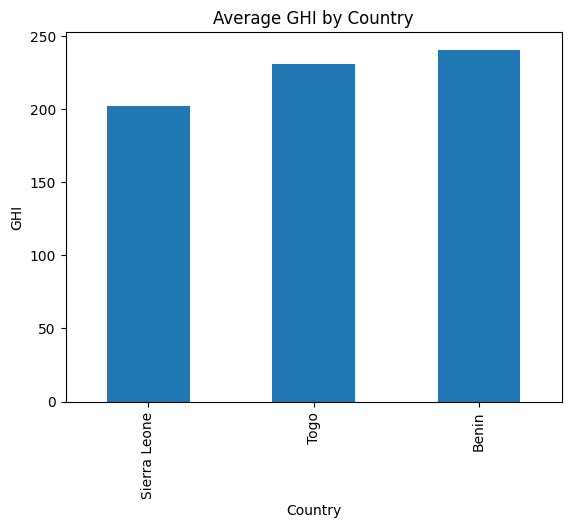

In [6]:
avg_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values()
avg_ghi.plot(kind="bar", title="Average GHI by Country")
plt.ylabel("GHI")
plt.show()
